## CODE TO PERFORM HARRIS CORNER DETECTION 

# LOAD/DISPLAY IMAGE

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline


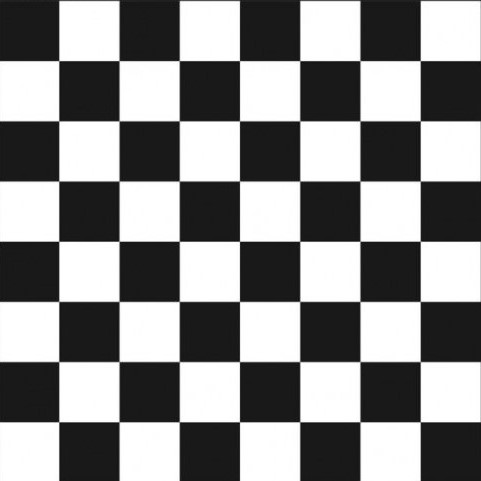

In [ ]:
image_color = cv2.imread('/content/drive/MyDrive/Self Driving Car/SelfDrivingMaterials/Section6/chessboard.jpg')
# cv2.imshow('Chessboard', image_color)
cv2_imshow(image_color)
cv2.waitKey()
cv2.destroyAllWindows()

## CONVERT TO GREYSCALE/APPLY HARRIS CORNER

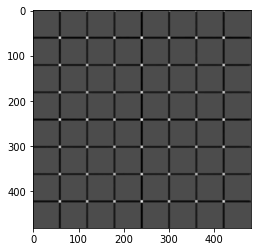

In [ ]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# cv2.cornerHarris(img, block size, ksize, k)

corners = cv2.cornerHarris(image_gray, 5, 3, 0.1)
plt.imshow(corners, cmap = 'gray')
plt.show()

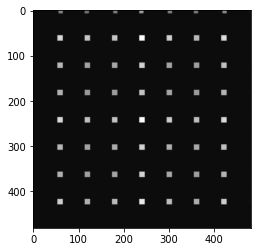

In [ ]:
corners_dilate = cv2.dilate(corners, np.ones((8,8),np.uint8), iterations = 1) # 8 * 8 kernel
plt.imshow(corners_dilate, cmap = 'gray')


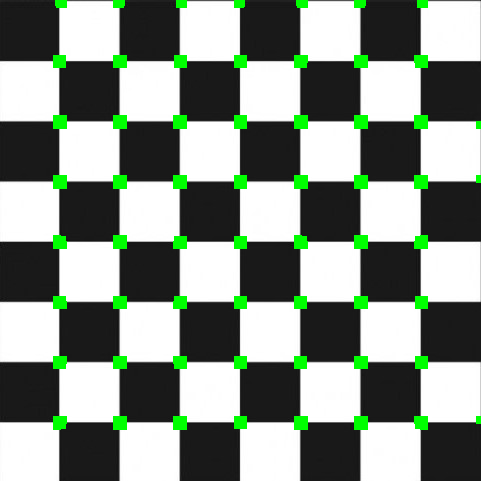

In [ ]:
image_color[corners_dilate > 0.01 * corners_dilate.max() ] = [0, 255, 0] # apply green on my corner

# cv2.imshow('Image with Corners', image_color)
cv2_imshow(image_color)
cv2.waitKey()
cv2.destroyAllWindows()

# LET'S GET CORNERS OF A TRUCK!

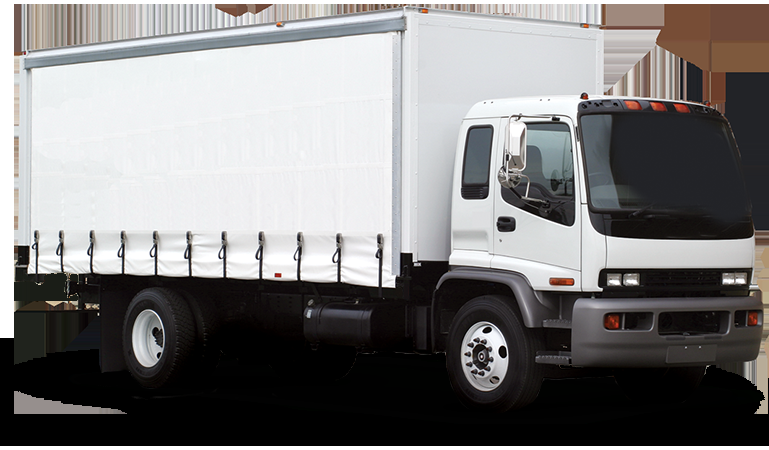

In [8]:
# image_color = cv2.imread('truck_back_color.jpg')
image_color = cv2.imread('/content/drive/MyDrive/Self Driving Car/SelfDrivingMaterials/Section6/truckrr.png')
# On Linux you may need to specify an absolute path to this image...

# cv2.imshow('Find Truck corners', image_color)
cv2_imshow(image_color)
cv2.waitKey()
cv2.destroyAllWindows()

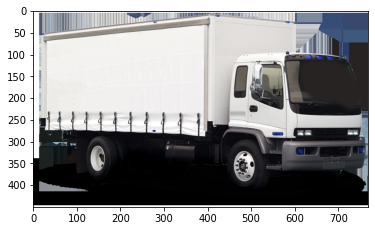

In [9]:
plt.imshow(image_color)


## CONVERT TO GREYSCALE

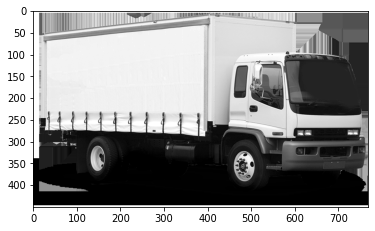

In [10]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')


In [11]:
image_gray.shape

(450, 769)

# PERFORM HARRIS CORNER DETECTION

In [12]:
corners = cv2.cornerHarris(image_gray, 7, 5, 0.1)
corners_dilate = cv2.dilate(corners, np.ones((8,8),np.uint8), iterations = 1)

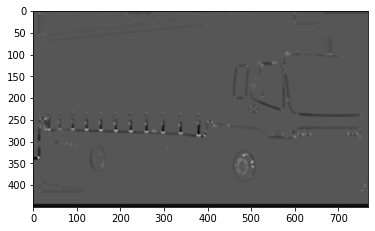

In [13]:
plt.imshow(corners, cmap = 'gray')
plt.show()

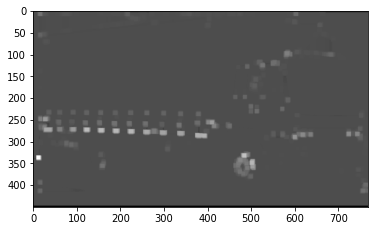

In [14]:
plt.imshow(corners_dilate, cmap = 'gray')


In [15]:
corners_dilate

array([[ 0.        ,  0.        ,  0.        , ..., -0.17293696,
        -0.17293696, -0.17293696],
       [ 0.        ,  0.        ,  0.        , ..., -0.17293696,
        -0.17293696, -0.17293696],
       [ 0.        ,  0.        ,  0.        , ..., -0.17293696,
        -0.17293696, -0.17293696],
       ...,
       [-0.7367349 , -0.7367349 , -0.7367349 , ..., -0.7367349 ,
        -0.7367349 , -0.7367349 ],
       [-0.8163268 , -0.8163268 , -0.8163268 , ..., -0.8163268 ,
        -0.8163268 , -0.8163268 ],
       [-0.8163268 , -0.8163268 , -0.8163268 , ..., -0.8163268 ,
        -0.8163268 , -0.8163268 ]], dtype=float32)

In [16]:
corners_dilate.shape



(450, 769)

In [17]:
#np.set_printoptions(threshold=np.nan)
#corners_dilate

In [18]:
corners_dilate.max()

1.8912982

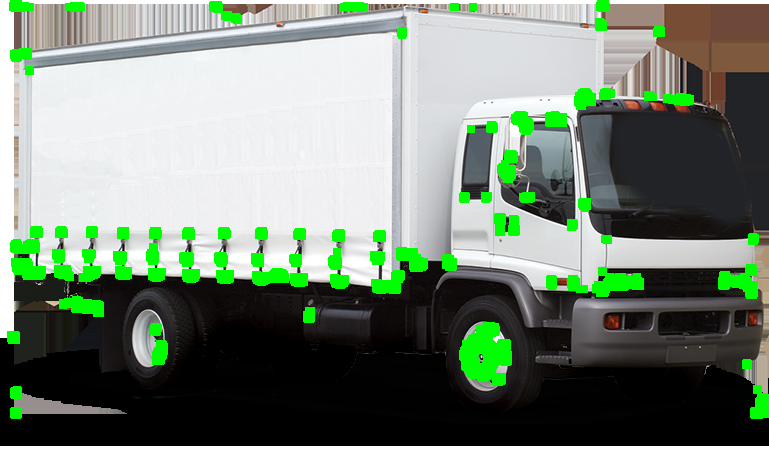

In [20]:
# If pixel value is greater than a threshold, return true and mark it as green
Image_color_corners = image_color.copy()
Image_color_corners[corners_dilate > 0.03 * corners_dilate.max() ] = [0, 255, 0]

# cv2.imshow('Image with Corners', Image_color_corners)
cv2_imshow(Image_color_corners)
cv2.waitKey()
cv2.destroyAllWindows()